In [80]:
#Generic DataScience Requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import csv

#Transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Classifiers
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

#Performance Measuring Tools
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [81]:
titanic = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')
test_pass_id = titanic_test['PassengerId']

In [82]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
titanic.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
#age, cabin,embarked all missing data 

In [85]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Data Description 
#### Passenger Id- Id of each passenger 
#### Survived - 0= No, 1 = yes
#### Pclass - ticket class 
#### Name - name of passenger 
#### sex - male or female 
#### sibsp - # of siblings/ spouses aboard the titanic 
#### parch - # number of parents/childern abroad the titanic 
#### ticket - ticekt number 
#### fare - passenger fare
#### cabin- cabin number
#### embarked - port of embarkation (C= cherbourg, Q= Queenstown, S= Southhampton)

#### Let's start by looking at the categorical variables 

In [86]:
titanic['Pclass'].value_counts() # majority of passengers 3rd class

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [87]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [88]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [89]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 0.98, &#39;Median age of per class&#39;)

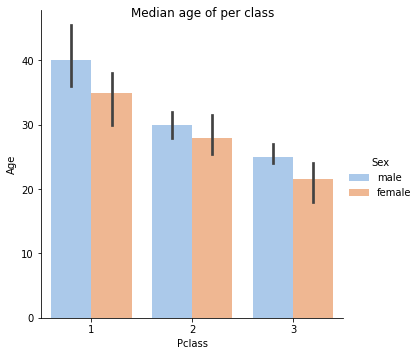

In [90]:
median_age = sns.catplot(x='Pclass',y='Age', kind= 'bar',estimator=np.median,hue='Sex',palette='pastel', data=titanic )
median_age.fig.suptitle('Median age of per class')

#### We see that the median age of for each class increases. Unsurpsiginly older passengers were in the better class


Text(0.5, 0.98, &#39;Median age of survived passenagers&#39;)

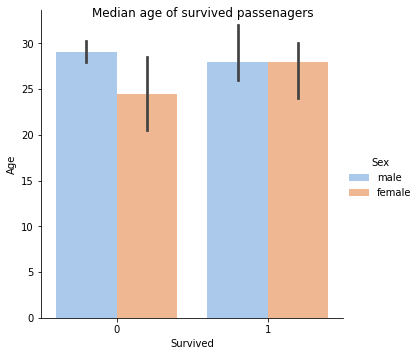

In [91]:
avg_surv = sns.catplot(x='Survived', y='Age', kind='bar',hue='Sex',palette='pastel',estimator=np.median, data= titanic)
avg_surv.fig.suptitle('Median age of survived passenagers')

#### The median age of woman and men that survived was around 27. Men who did not survive had were slightly older, and woman that did not survive were around 24 years of age

Text(0.5, 0.98, &#39;Averge cost of fare per class&#39;)

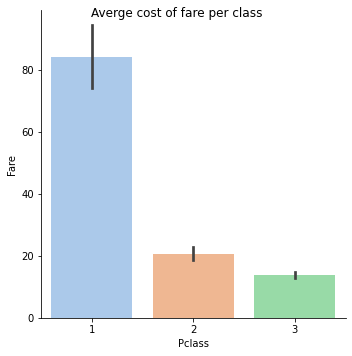

In [92]:
avg_fare = sns.catplot(x='Pclass', y='Fare', kind='bar', estimator=np.mean, palette = 'pastel',data=titanic)
avg_fare.fig.suptitle('Averge cost of fare per class')

#### The average cost of a a ticket increases over 50% for first class

Text(0.5, 0.98, &#39;Sex survived by class&#39;)

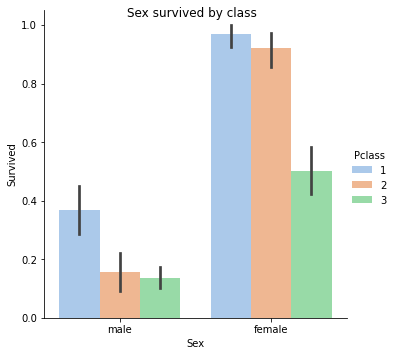

In [93]:
class_surv = sns.catplot(x='Sex', y='Survived',hue='Pclass', kind= 'bar',palette='pastel', data= titanic)
class_surv.fig.suptitle('Sex survived by class')

#### We see females had a higher survival rate, with classes seeming to be a factor. The majority of survivors were first class woman

Text(0.5, 0.98, &#39;Survival rate of embarked location&#39;)

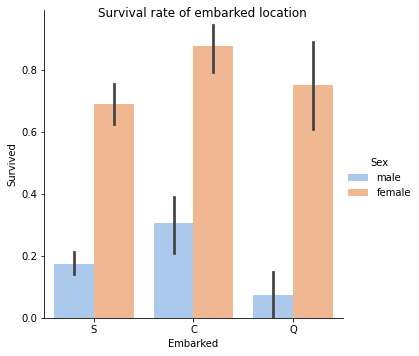

In [94]:
embarked_surv = sns.catplot(x='Embarked', y='Survived', hue='Sex', kind= 'bar',palette='pastel', data=titanic)
embarked_surv.fig.suptitle('Survival rate of embarked location')

#### Does embarked location have any impact on survival?  There is not an embarked location that appears to have a higher survival rate

Text(0.5, 0.98, &#39;Survival rate of embarked location&#39;)

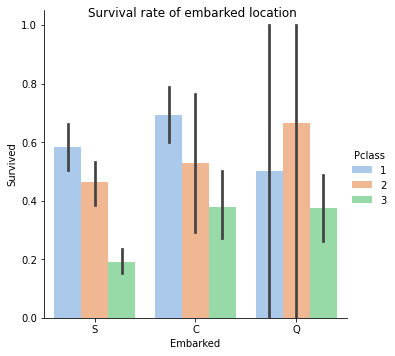

In [95]:
embarked_surv = sns.catplot(x='Embarked', y='Survived', hue='Pclass', kind= 'bar',palette='pastel', data=titanic)
embarked_surv.fig.suptitle('Survival rate of embarked location')

Text(0.5, 0.98, &#39;Average fare of survived passengers&#39;)

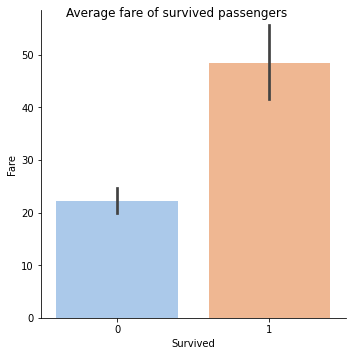

In [96]:
fare_surv = sns.catplot(x='Survived', y='Fare', kind= 'bar',palette='pastel',data=titanic)
fare_surv.fig.suptitle('Average fare of survived passengers')

#### We see that the on average passengers who survived spend 45 dollars on their fare

#### Let's see look at the relationship between SibSp and Parch with Survival 

&lt;matplotlib.axes._subplots.AxesSubplot at 0x2225dfff460&gt;

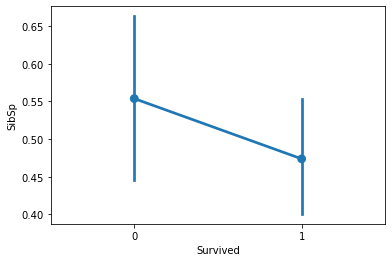

In [97]:
sns.pointplot(x='Survived', y='SibSp', data= titanic)

#### Passengers with more siblings or spouses present were less likely to survive

&lt;matplotlib.axes._subplots.AxesSubplot at 0x2225e12d520&gt;

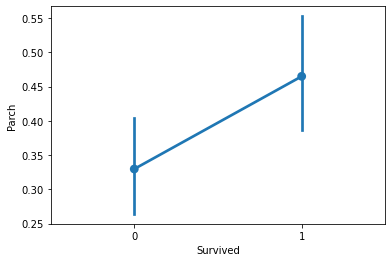

In [98]:
sns.pointplot(x='Survived', y='Parch', data= titanic)

#### The number of parents to children had a positive relationship with survival- suggesting parents and children may have been prioritized. This is the opposite of the relationship with see with survival and sibsp

In [99]:
# transform ticket class, sex, embark location 
#age, cabin,embarked all missing data deal with missing values
# see how ticket class, sex, ticket fare, age and embarked location predict survival rate 

# 1. Drop columns we don't need
# 2. Deal with missing values
# 3. Hot encode categorical values
# 4. Drop NA
# 5. Standadrize values
# 6. Run models 

In [100]:
titanic = titanic.drop(['Name','Ticket','Cabin'], axis=1)
titanic_test = titanic_test.drop(['Name','Ticket','Cabin'], axis=1)

In [101]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [102]:
#embarked has 2 null values. 
titanic['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [103]:
titanic['Embarked']= titanic['Embarked'].fillna('S')
titanic_test['Embarked']= titanic['Embarked'].fillna('S')

In [104]:
# let's turn categorical values into dummy variables

In [105]:
cat_encoder = OneHotEncoder(categories='auto')
features = cat_encoder.fit_transform(titanic[['Pclass','Sex',
                                           'Embarked']]).toarray()
feature_labels = cat_encoder.categories_
feature_labels = np.array(feature_labels).ravel()
feature_labels

array([array([1, 2, 3], dtype=int64),
       array([&#39;female&#39;, &#39;male&#39;], dtype=object),
       array([&#39;C&#39;, &#39;Q&#39;, &#39;S&#39;], dtype=object)], dtype=object)

In [106]:
features_test = cat_encoder.fit_transform(titanic[['Pclass','Sex',
                                           'Embarked']]).toarray()
feature_labels_test = cat_encoder.categories_
feature_labels_test = np.array(feature_labels).ravel()
feature_labels_test                                           

array([array([1, 2, 3], dtype=int64),
       array([&#39;female&#39;, &#39;male&#39;], dtype=object),
       array([&#39;C&#39;, &#39;Q&#39;, &#39;S&#39;], dtype=object)], dtype=object)

In [107]:
feats = pd.DataFrame(features, columns=['1','2','3','female','male','C','Q','S'])
feats.head()


,1,2,3,female,male,C,Q,S
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [108]:
feats_test = pd.DataFrame(features_test, columns=['1','2','3','female','male','C','Q','S'])
feats_test.head()

,1,2,3,female,male,C,Q,S
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [109]:
titanic= titanic.join(feats, how='inner')
titanic = titanic.drop(['PassengerId','Pclass','Sex','Embarked'],axis=1)
titanic.head()

,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [110]:
titanic_test= titanic_test.join(feats_test, how='inner')
titanic_test = titanic_test.drop(['PassengerId','Pclass','Sex','Embarked'],axis=1)
titanic_test.head()
print(len(titanic_test))

418


In [111]:
# transform all na values into median values 
imputer = SimpleImputer(strategy='median')
x= imputer.fit_transform(titanic)
#x =imputer.transform(titanic)

In [112]:
x_test = imputer.fit_transform(titanic_test)

In [113]:
titanic = pd.DataFrame(x, index= titanic.index,columns=titanic.columns)
titanic.head()

,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,0.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [114]:
titanic_test = pd.DataFrame(x_test, index= titanic_test.index,columns=titanic_test.columns)
titanic.head()

,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,0.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [115]:
titanic_sur = titanic['Survived']

In [116]:
titanic_pred = titanic.drop('Survived', axis=1)

In [117]:
scaler = StandardScaler()
scaler.fit(titanic_pred)
x = scaler.fit_transform(titanic_pred)
x_test = scaler.fit_transform(titanic_test)

In [118]:
titanic = pd.DataFrame(x, index= titanic_pred.index,columns=titanic_pred.columns)
titanic.head()

,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,-0.565736,0.432793,-0.473674,-0.502445,-0.565685,-0.510152,0.902587,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,0.663861,0.432793,-0.473674,0.786845,1.767767,-0.510152,-1.107926,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,-0.258337,-0.474545,-0.473674,-0.488854,-0.565685,-0.510152,0.902587,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,0.433312,0.432793,-0.473674,0.420730,1.767767,-0.510152,-1.107926,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,0.433312,-0.474545,-0.473674,-0.486337,-0.565685,-0.510152,0.902587,-0.737695,0.737695,-0.482043,-0.307562,0.615838


In [119]:
titanic = titanic.join(titanic_sur, how='outer')
titanic

,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S,Survived
0,-0.565736,0.432793,-0.473674,-0.502445,-0.565685,-0.510152,0.902587,-0.737695,0.737695,-0.482043,-0.307562,0.615838,0.0
1,0.663861,0.432793,-0.473674,0.786845,1.767767,-0.510152,-1.107926,1.355574,-1.355574,2.074505,-0.307562,-1.623803,1.0
2,-0.258337,-0.474545,-0.473674,-0.488854,-0.565685,-0.510152,0.902587,1.355574,-1.355574,-0.482043,-0.307562,0.615838,1.0
3,0.433312,0.432793,-0.473674,0.420730,1.767767,-0.510152,-1.107926,1.355574,-1.355574,-0.482043,-0.307562,0.615838,1.0
4,0.433312,-0.474545,-0.473674,-0.486337,-0.565685,-0.510152,0.902587,-0.737695,0.737695,-0.482043,-0.307562,0.615838,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.181487,-0.474545,-0.473674,-0.386671,-0.565685,1.960202,-1.107926,-0.737695,0.737695,-0.482043,-0.307562,0.615838,0.0
887,-0.796286,-0.474545,-0.473674,-0.044381,1.767767,-0.510152,-1.107926,1.355574,-1.355574,-0.482043,-0.307562,0.615838,1.0
888,-0.104637,0.432793,2.008933,-0.176263,-0.565685,-0.510152,0.902587,1.355574,-1.355574,-0.482043,-0.307562,0.615838,0.0
889,-0.258337,-0.474545,-0.473674,-0.044381,1.767767,-0.510152,-1.107926,-0.737695,0.737695,2.074505,-0.307562,-1.623803,1.0


let's do some additional visualization of the cleaned data

&lt;matplotlib.axes._subplots.AxesSubplot at 0x2225e170a30&gt;

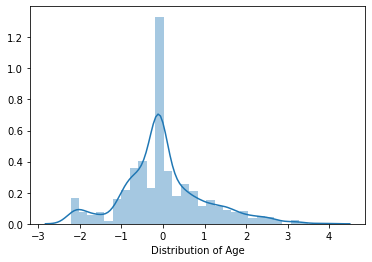

In [120]:
sns.distplot(titanic['Age'], axlabel='Distribution of Age')

&lt;matplotlib.axes._subplots.AxesSubplot at 0x2225e222c40&gt;

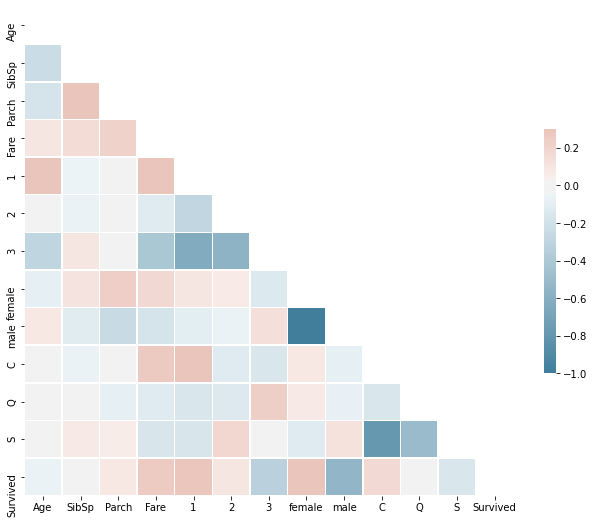

In [121]:
corr = titanic.corr()
mask= np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230,20, as_cmap= True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidth= .5, cbar_kws={'shrink':.5})

As expected we see some correlations between sex, class and survival. 

# Summary
Overall we've found several possible predictors of survival rate such as the boarding class passengers belonged to, age, sex, fare price. The parent/child relationship and sibling/spouse relationship may also play an important factor of survival

We anticipate these features will be able to successfully predict survival of passengers


In [122]:
# let's create our split our data into a test, train df. 
#train_set, test_set = train_test_split(titanic, test_size=0.2,random_state = 72)


# Building the Model

In [123]:
#Splitting the target value from the datasets
y_train = titanic['Survived']
train_set = titanic.drop(columns='Survived', axis=1)

#Commented out for now (not using test split. We already have test data)
#y_test = test_set['Survived']
#test_set = test_set.drop(columns='Survived', axis=1)

In [124]:
#Lets start with Gradient Descent
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_set, y_train)

SGDClassifier(random_state=42)

In [125]:
cross_val_score(sgd_clf, train_set, y_train,cv=3, scoring='accuracy')

array([0.7003367 , 0.68013468, 0.75420875])

In [126]:
y_train_pred = cross_val_predict(sgd_clf, train_set, y_train, cv=3)

In [127]:
confusion_matrix(y_train, y_train_pred)

array([[454,  95],
       [162, 180]], dtype=int64)

In [128]:
precision_score(y_train, y_train_pred) #160/160+56

0.6545454545454545

In [129]:
print(f'precision: {160/(160+56)}')
print(f'recall: {160/(160+83)}')

precision: 0.7407407407407407
recall: 0.6584362139917695


In [130]:
recall_score(y_train, y_train_pred)

0.5263157894736842

In [131]:
f1_score(y_train, y_train_pred)

0.5834683954619124

In [132]:
y_scores = cross_val_predict(sgd_clf, train_set, y_train, cv=3, method='decision_function')
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [133]:
def plot_roc_curve(fpr,tpr, label=None):
    plt.plot(fpr,tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')

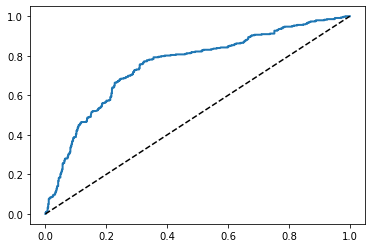

In [134]:
plot_roc_curve(fpr,tpr)
plt.show()

In [135]:
roc_auc_score(y_train, y_train_pred)

0.6766369475601571

In [136]:
#Now lets try Random Foreset
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(train_set, y_train)
y_probas_forest = cross_val_predict(forest_clf, train_set, y_train, cv=3, method='predict_proba')

In [137]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

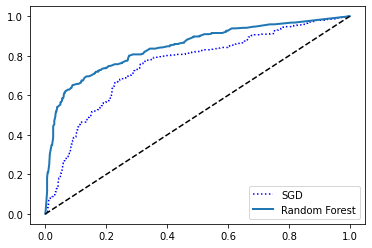

In [138]:
plt.plot(fpr,tpr,'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [140]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(var_smoothing=0.000000000000000000000001)
gnb.fit(train_set, y_train)
y_pred_gnb = gnb.predict(titanic_test)
gnb_test_results = gnb.predict(titanic_test)

In [141]:
cross_val_score(gnb, train_set,y_train, cv=3, scoring='accuracy')

array([0.7037037, 0.7979798, 0.7979798])

In [142]:
y_train_pred_gnb = cross_val_predict(gnb, train_set, y_train, cv=3)
confusion_matrix(y_train, y_train_pred_gnb)

array([[451,  98],
       [110, 232]], dtype=int64)

In [63]:
print('Gaussion Results')
print(f'Precision:{precision_score(y_train,y_train_pred_gnb)}')
print(f'Recall:{recall_score(y_train, y_train_pred_gnb)}')
print(f'F1 Score:{f1_score(y_train, y_train_pred_gnb)}')

Gaussion Results
Precision:0.703030303030303
Recall:0.6783625730994152
F1 Score:0.6904761904761905


In [144]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_set, y_train)

log_pred = log_reg.predict(titanic_test)

In [145]:
log_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [64]:
#Random Forest Prediction
forest_pred = forest_clf.predict(titanic_test)
sgd_pred = sgd_clf.predict(titanic_test)

# Save results to CSV

In [65]:
def saveToCSV(predictions):
    pd.DataFrame(list(zip(np.array(test_pass_id),predictions.astype(int))), columns=['PassengerId', 'Survived']).to_csv('results.csv', index=False)
    print('Saved to results.csv')

# Extras Grid Search

In [66]:
#Lets find what Random Forest Classifier Hyper-parameters we cna use
forest_clf.get_params().keys()

dict_keys([&#39;bootstrap&#39;, &#39;ccp_alpha&#39;, &#39;class_weight&#39;, &#39;criterion&#39;, &#39;max_depth&#39;, &#39;max_features&#39;, &#39;max_leaf_nodes&#39;, &#39;max_samples&#39;, &#39;min_impurity_decrease&#39;, &#39;min_impurity_split&#39;, &#39;min_samples_leaf&#39;, &#39;min_samples_split&#39;, &#39;min_weight_fraction_leaf&#39;, &#39;n_estimators&#39;, &#39;n_jobs&#39;, &#39;oob_score&#39;, &#39;random_state&#39;, &#39;verbose&#39;, &#39;warm_start&#39;])

In [67]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth' : [6,7,8,10,12, None],
    'bootstrap': [False,True],
    'criterion' : ['gini', 'entropy']
}

grid_search = GridSearchCV(forest_clf, param_grid,
    cv=3, return_train_score=True)
grid_search.fit(train_set, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={&#39;bootstrap&#39;: [False, True],
                         &#39;criterion&#39;: [&#39;gini&#39;, &#39;entropy&#39;],
                         &#39;max_depth&#39;: [6, 7, 8, 10, 12, None],
                         &#39;max_features&#39;: [&#39;auto&#39;, &#39;sqrt&#39;, &#39;log2&#39;, None],
                         &#39;n_estimators&#39;: [200, 500]},
             return_train_score=True)

In [68]:
grid_search.best_params_

{&#39;bootstrap&#39;: True,
 &#39;criterion&#39;: &#39;entropy&#39;,
 &#39;max_depth&#39;: 7,
 &#39;max_features&#39;: None,
 &#39;n_estimators&#39;: 200}

In [69]:
#lets find what hyperparameters we can try and fine tune
sgd_clf.get_params().keys()

dict_keys([&#39;alpha&#39;, &#39;average&#39;, &#39;class_weight&#39;, &#39;early_stopping&#39;, &#39;epsilon&#39;, &#39;eta0&#39;, &#39;fit_intercept&#39;, &#39;l1_ratio&#39;, &#39;learning_rate&#39;, &#39;loss&#39;, &#39;max_iter&#39;, &#39;n_iter_no_change&#39;, &#39;n_jobs&#39;, &#39;penalty&#39;, &#39;power_t&#39;, &#39;random_state&#39;, &#39;shuffle&#39;, &#39;tol&#39;, &#39;validation_fraction&#39;, &#39;verbose&#39;, &#39;warm_start&#39;])

In [70]:
param_grid = { 
    'n_jobs': [200, 500, -1],
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2','l1','elasticnet']
}
grid_search_2 = GridSearchCV(sgd_clf, param_grid,
    cv=3, return_train_score=True)
grid_search_2.fit(train_set, y_train)

GridSearchCV(cv=3, estimator=SGDClassifier(random_state=42),
             param_grid={&#39;loss&#39;: [&#39;hinge&#39;, &#39;log&#39;, &#39;modified_huber&#39;,
                                  &#39;squared_hinge&#39;, &#39;perceptron&#39;, &#39;squared_loss&#39;,
                                  &#39;huber&#39;, &#39;epsilon_insensitive&#39;],
                         &#39;n_jobs&#39;: [200, 500, -1],
                         &#39;penalty&#39;: [&#39;l2&#39;, &#39;l1&#39;, &#39;elasticnet&#39;]},
             return_train_score=True)

In [71]:
grid_search_2.best_params_

{&#39;loss&#39;: &#39;huber&#39;, &#39;n_jobs&#39;: 200, &#39;penalty&#39;: &#39;l2&#39;}

In [72]:
tuned_rfc = RandomForestClassifier(random_state=42, max_features=None, n_estimators= 200, max_depth=7, criterion='entropy')
tuned_rfc.fit(train_set, y_train)

RandomForestClassifier(criterion=&#39;entropy&#39;, max_depth=7, max_features=None,
                       n_estimators=200, random_state=42)

In [73]:
tuned_sgd = SGDClassifier(loss='huber',n_jobs=200,penalty='l2').fit(train_set,y_train)
tuned_sgd_pred = tuned_sgd.predict(titanic_test)

In [74]:
tuned_pred = tuned_rfc.predict(titanic_test)

In [75]:
y_score_sgd = cross_val_predict(tuned_sgd,train_set,y_train)
cross_val_score(tuned_sgd,train_set,y_train)

array([0.80446927, 0.80898876, 0.78651685, 0.75280899, 0.78651685])

In [76]:
y_score = cross_val_predict(tuned_rfc,train_set, y_train)
cross_val_score(tuned_rfc,train_set, y_train)

array([0.80446927, 0.83707865, 0.85955056, 0.80337079, 0.84269663])

In [77]:
saveToCSV(tuned_pred)

Saved to results.csv


In [146]:
saveToCSV(log_pred)

Saved to results.csv
